In [239]:
#Evghenii Gaisinschii 336551072
#Eugene Golovanov 323554121

In [185]:

#PART1

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [186]:
ttw = pd.read_csv('trainTwitter.csv')
ttw.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [187]:
NumOf_Words = []
NumOf_Let = []
Word_Avg_Size = []
NumOf_Stopwords = []
NumOf_Number_Char = []
NumOf_Hashtag = []
NumOf_a = []
NumOf_Other_Sym = []
NumOf_Caps_Words = []

for t in ttw.tweet:
    
    val = re.findall(r'\w+', t)
    NumOf_Words.append(len(val))
    
    val = re.findall(r'\w', t)
    NumOf_Let.append(len(val))
    
    val = re.findall(r'\w+', t)
    average = sum(len(word) for word in val) / len(val)
    Word_Avg_Size.append(round(average, 3))
    
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(t)
    cnt_Stopwords = [w for w in word_tokens if w in stop_words]
    NumOf_Stopwords.append(len(cnt_Stopwords))
    
    val = re.findall(r'[0-9]', t)
    NumOf_Number_Char.append(len(val))
    
    val = re.findall(r'[#]', t)
    NumOf_Hashtag.append(len(val))
    
    val = re.findall(r'[@]', t)
    NumOf_a.append(len(val))
    
    val = re.findall(r'[^a-zA-Z0-9 ]', t)
    NumOf_Other_Sym.append(len(val))
    
    val = re.findall(r'[A-Z]\w+', t)
    NumOf_Caps_Words.append(len(val))

In [188]:
final2 = pd.DataFrame({'NumOf_Words': NumOf_Words, 
                      'NumOf_Let': NumOf_Let, 
                      'Word_Avg_Size': Word_Avg_Size, 
                      'NumOf_Stopwords': NumOf_Stopwords, 
                      'NumOf_Number_Char': NumOf_Number_Char,
                      'NumOf_#': NumOf_Hashtag, 
                      'NumOf_@': NumOf_a, 
                      'NumOf_Other_Sym': NumOf_Other_Sym, 
                      'NumOf_Caps_Words': NumOf_Caps_Words})
final2.head()

NumOf_Words  NumOf_Let  Word_Avg_Size  NumOf_Stopwords  NumOf_Number_Char  \
0           18         79          4.389               10                  0   
1           21         93          4.429                5                  0   
2            3         17          5.667                1                  0   
3           19         42          2.211                5                  0   
4            4         30          7.500                1                  0   

   NumOf_#  NumOf_@  NumOf_Other_Sym  NumOf_Caps_Words  
0        1        1                3                 0  
1        3        2                8                 0  
2        0        0                0                 0  
3        1        0               36                 0  
4        1        0                2                 0

In [189]:
final2.to_csv('values.csv', index=False)

In [190]:
ttw2 = ttw
ttw2.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [200]:
#Part2 Visualization

import wordcloud
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import squarify 

import seaborn as sns

In [201]:
#WORDCLOUD

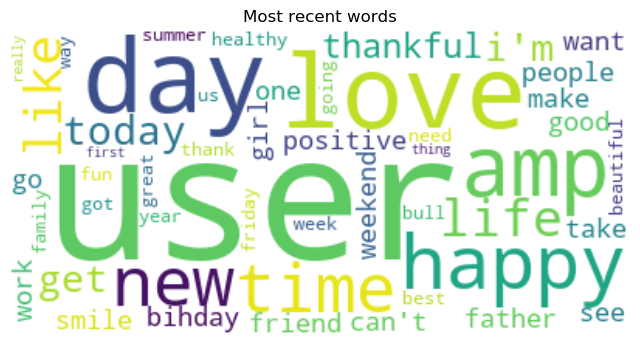

In [202]:
#2.1.1
text2 = ''
for i in range(len(ttw2.tweet)):
    text2 = text2 + ttw2.tweet[i]

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=50, background_color="white", stopwords = stop_words, collocations=False).generate(text2)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most recent words')
plt.axis("off")
plt.show()

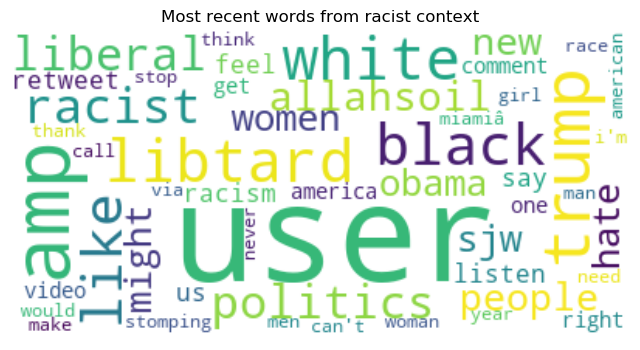

In [203]:
#2.1.2
#Wordcloud per label 1


label1 = ttw2.tweet.loc[(ttw2.label == 1)]
text3 = ''
for i in range(len(label1)):
    text3 = text3 + label1.values[i]

# Create and generate a word cloud image:

# Without stop words and special characters
wordcloud = WordCloud(max_words=50, background_color="white", stopwords = stop_words, collocations=False).generate(text3)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most recent words from racist context')
plt.axis("off")
plt.show()

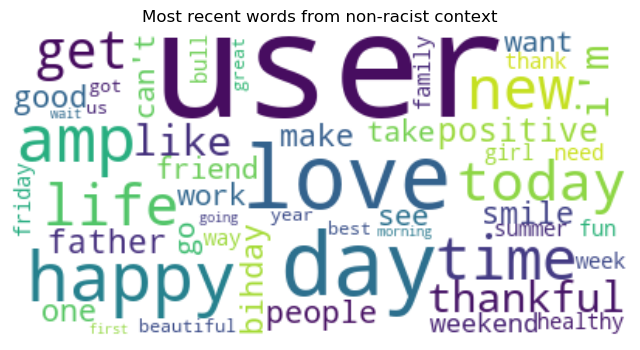

In [204]:
#2.1.3
#Wordcloud per label 0
label0 = ttw2.tweet.loc[(ttw2.label == 0)]
text4 = ''
for i in range(len(label0)):
    text4 = text4 + label0.values[i]

# Create and generate a word cloud image:

# Without stop words and special characters
wordcloud = WordCloud(max_words=50, background_color="white", stopwords = stop_words, collocations=False).generate(text4)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most recent words from non-racist context')
plt.axis("off")
plt.show()

In [205]:
#TREEMAP

In [206]:
#Most recent words
freq=pd.Series(''.join(ttw['tweet']).split()).value_counts()[:20]
freq


@user    15856
the       9934
to        9758
a         6202
i         5240
you       4895
and       4821
in        4552
for       4427
of        4151
is        4088
my        3533
on        2542
with      2474
this      2377
be        2349
it        2080
so        1820
all       1802
are       1778
dtype: int64

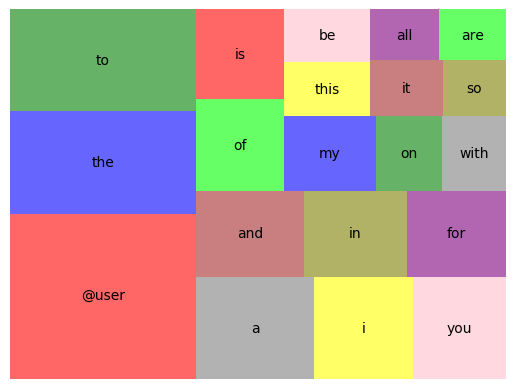

In [207]:
#2.2 tree-map diagram
# With stop words and special characters


sizes=freq
label=freq.index
color=['red','blue','green','grey', 'yellow', 'pink', 'brown', 'olive', 'purple', 'lime']
squarify.plot(sizes=sizes, label=label, color=color, alpha=0.6)
plt.axis('off')
plt.show()

In [208]:
#WORDS_PER_TWEETS

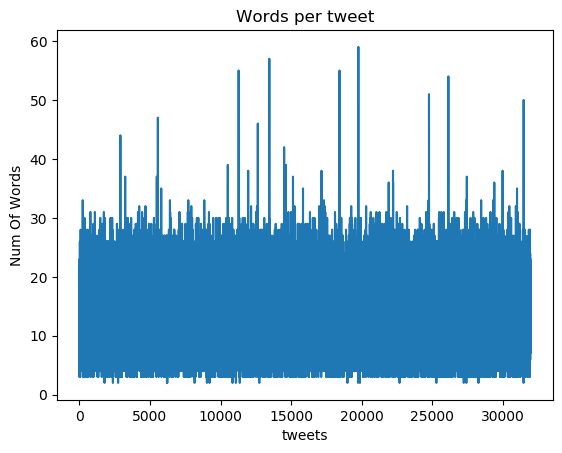

In [209]:
#2.3

tweet1 = ttw['id'].tolist()
plt.plot(tweet1, NumOf_Words)                                             
plt.xlabel('tweets')
plt.ylabel('Num Of Words')
plt.xticks()
plt.title('Words per tweet')
plt.yticks()
plt.style.use('default')
plt.show()

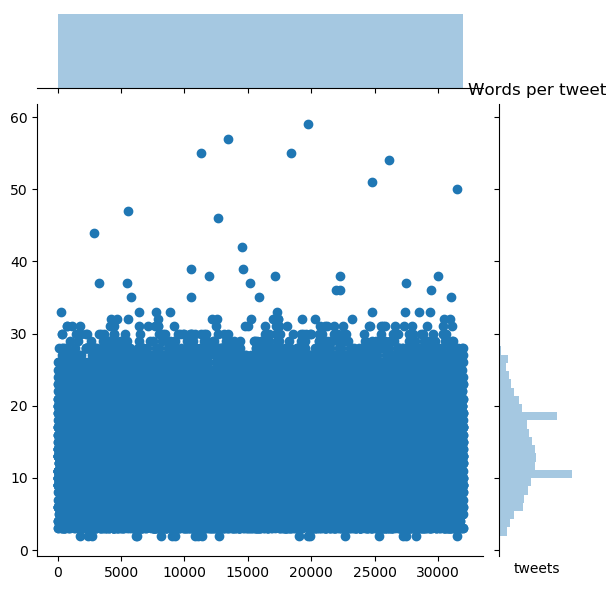

In [210]:
#plt.scatter(tweet1, NumOf_Words)
sns.jointplot(tweet1, NumOf_Words)
#plt.style.use('default')
plt.xlabel('tweets')
#plt.ylabel('Num Of Words')
plt.title('Words per tweet')


#sns.jointplot(tweet1, NumOf_Words)
plt.show()

We can see standart amount of words in tweeter

In [211]:
#LETTERS_PER_TWEET

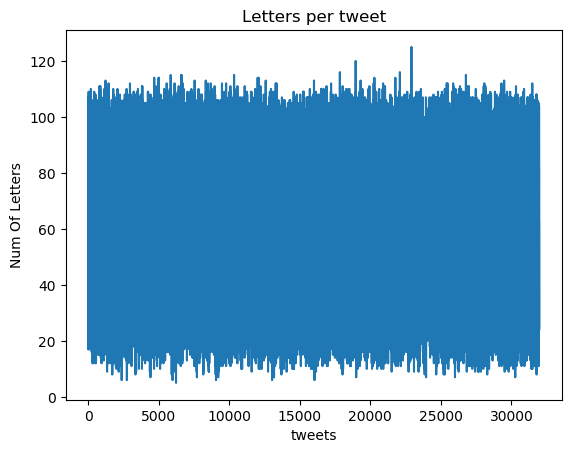

In [212]:
#2.4
tweet2 = ttw['id'].tolist()
plt.plot(tweet2, NumOf_Let)                                             
plt.xlabel('tweets')
plt.ylabel('Num Of Letters')
plt.xticks()
plt.title('Letters per tweet')
plt.yticks()
plt.style.use('default')
plt.show()

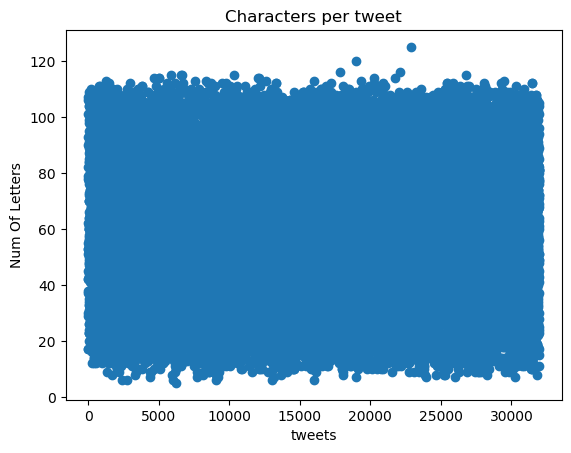

In [213]:
plt.scatter(tweet2, NumOf_Let)
plt.style.use('default')
plt.xlabel('tweets')
plt.ylabel('Num Of Letters')
plt.title('Characters per tweet')
plt.show()

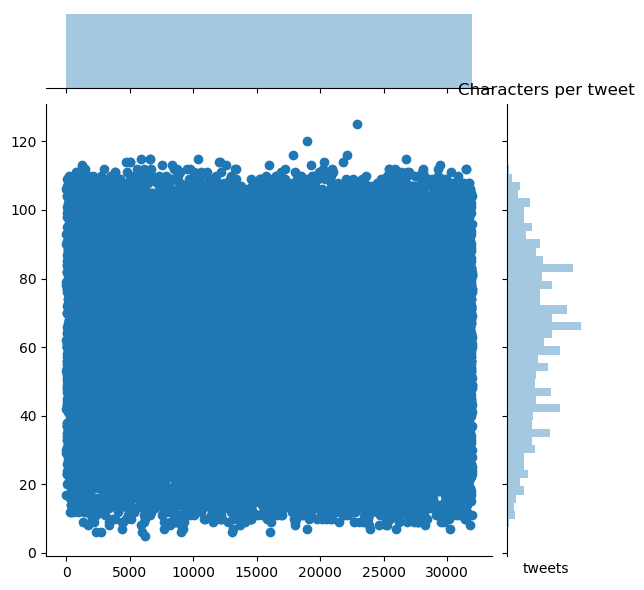

In [214]:
sns.jointplot(tweet2, NumOf_Let)
plt.xlabel('tweets')
#plt.ylabel('Num Of Letters')
plt.title('Characters per tweet')
plt.show()

In [169]:
# IDEAS FOR VISUALIZATION

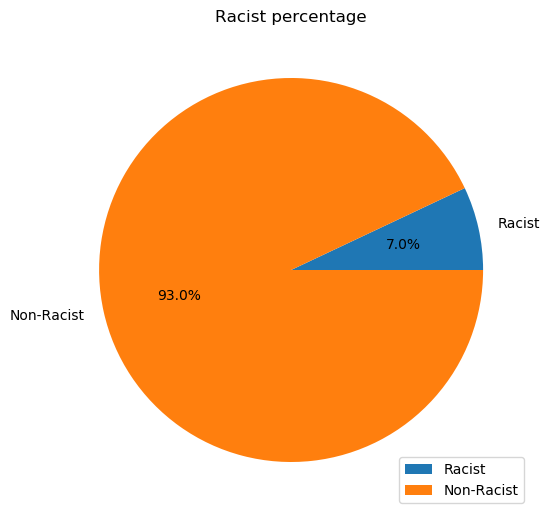

In [215]:
import numpy as np

#2.5.1

df = ttw2
monthList = df['id'].tolist()
facecream = df['label'].tolist()

total=len(monthList)
prob = []

elements, counts = np.unique(df['label'], return_counts=True)

prob.append(int(counts[1])/int(counts[0]+counts[1]))
prob.append(int(counts[0])/int(counts[0]+counts[1]))


products = ['Racist', 'Non-Racist']
plt.pie(prob, autopct = '%.1f%%', labels = products)
plt.legend(loc = 'lower right', markerfirst = True, numpoints=1)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
plt.title('Racist percentage')
plt.style.use('default')
plt.show()

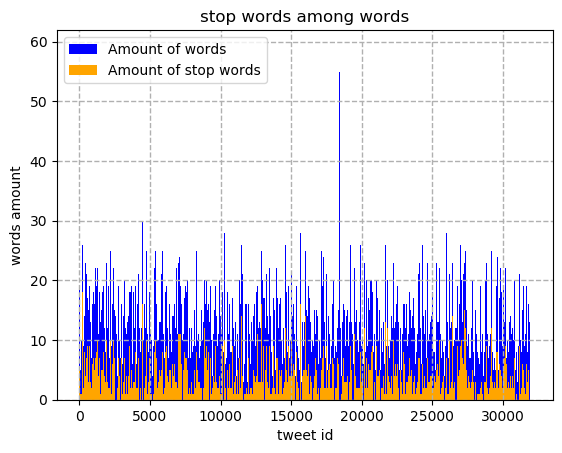

In [216]:
#2.5.2

data = ttw2
fig, ax = plt.subplots()

ax.grid(b = True, which = 'both', linestyle='--', linewidth=1)
ax.bar(data.id,NumOf_Words,1,label = 'Amount of words', color = 'blue')
ax.bar(data.id,NumOf_Stopwords,1,label = 'Amount of stop words', color = 'orange')

ax.set_title('stop words among words')
ax.set_xlabel('tweet id')
ax.set_ylabel('words amount')
#ax.set_xticks(data.id)
ax.legend(loc = 'upper left')

plt.show()

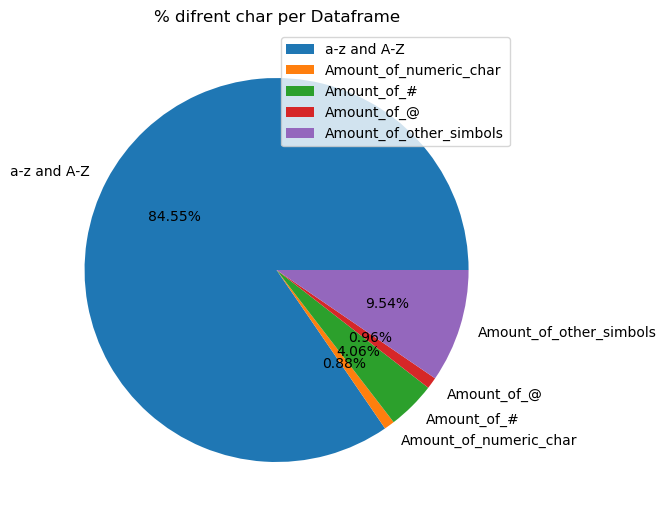

In [217]:
#2.5.3

df=pd.read_csv('values.csv')



Data=[]

for i in df:
    sum=0
    if i != 'NumOf_Words' and i != 'Word_Avg_Size' and i != 'NumOf_Stopwords' and i != 'NumOf_Caps_Words' :
        for j in range(len(df[i])):
            sum =sum + df[i][j]
        Data.append(sum)

Data[0]=Data[0]-(Data[1]+Data[2]+Data[3]+Data[4])
Data[4]=Data[4]-(Data[2]+Data[3])


plt.pie(Data, autopct = '%.2f%%', labels = ['a-z and A-Z','Amount_of_numeric_char','Amount_of_#','Amount_of_@','Amount_of_other_simbols'])
plt.legend(loc = 'best', markerfirst = True, numpoints=1)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1)
plt.title('% difrent char per Dataframe')
plt.style.use('default')
plt.show()

In [218]:
#PART3

In [219]:
#1
ttw2.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [220]:
#3.1
ttw2['tweet'] = ttw2['tweet'].str.lower()

In [221]:
ttw2.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [222]:
#3.2


ttw2['tweet'] = ttw2['tweet'].str.replace('[^\w\s]','') 
ttw2['tweet'] = ttw2['tweet'].str.replace('[^a-z ]','') 
ttw2.head(15)

id  label                                              tweet
0    1      0   user when a father is dysfunctional and is so...
1    2      0  user user thanks for lyft credit i cant use ca...
2    3      0                                bihday your majesty
3    4      0  model   i love u take with u all the time in u...
4    5      0               factsguide society now    motivation
5    6      0   huge fan fare and big talking before they lea...
6    7      0   user camping tomorrow user user user user use...
7    8      0  the next school year is the year for exams can...
8    9      0  we won love the land allin cavs champions clev...
9   10      0          user user welcome here   im   its so gr  
10  11      0    ireland consumer price index mom climbed fro...
11  12      0  we are so selfish orlando standwithorlando pul...
12  13      0      i get to see my daddy today   days gettingfed
13  14      1  user cnn calls michigan middle school build th...
14  15      1  no comment  in australia   opkillingbay seashe...

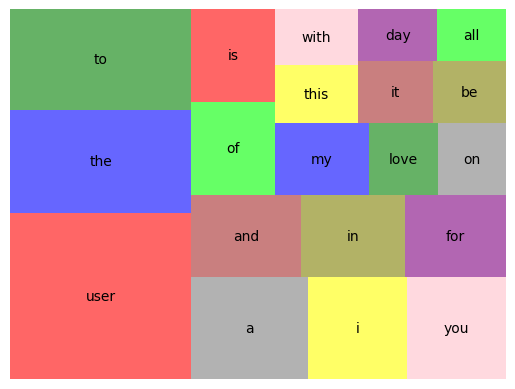

In [223]:
freq=pd.Series(''.join(ttw2['tweet']).split()).value_counts()[:20]


sizes=freq
label=freq.index
color=['red','blue','green','grey', 'yellow', 'pink', 'brown', 'olive', 'purple', 'lime']
squarify.plot(sizes=sizes, label=label, color=color, alpha=0.6)
plt.axis('off')
plt.show()

In [224]:
# #3

# ttw2['tweet'] = ttw2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
# ttw2.head(20)

In [225]:
#3.3
NumOf_low_Stopwords=[]
set_of_low_stopwords=set()

for t in ttw2.tweet:
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(t)
    act_Stopwords = [w for w in word_tokens if w in stop_words]
    
    
    #new count for stopword.lower()
    NumOf_low_Stopwords.append(len(act_Stopwords))
    for stopword in act_Stopwords:
        set_of_low_stopwords.add(stopword)
        

In [226]:
for ID in  range(len(ttw2['tweet'])):
    #print(ID)
    #print(ttw2['tweet'][ID])
    querywords = ttw2['tweet'][ID].split()
    #print(querywords)
    #stop_words = set(stopwords.words('english'))
    resultwords  = [word for word in querywords if word not in stop_words]
    ttw2['tweet'][ID] = ' '.join(resultwords)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [227]:
ttw2.head(15)

id  label                                              tweet
0    1      0  user father dysfunctional selfish drags kids d...
1    2      0  user user thanks lyft credit cant use cause do...
2    3      0                                     bihday majesty
3    4      0                        model love u take u time ur
4    5      0                      factsguide society motivation
5    6      0  huge fan fare big talking leave chaos pay disp...
6    7      0  user camping tomorrow user user user user user...
7    8      0  next school year year exams cant think school ...
8    9      0  love land allin cavs champions cleveland cleve...
9   10      0                            user user welcome im gr
10  11      0  ireland consumer price index mom climbed previ...
11  12      0  selfish orlando standwithorlando pulseshooting...
12  13      0                get see daddy today days gettingfed
13  14      1  user cnn calls michigan middle school build wa...
14  15      1  comment australia opkillingbay seashepherd hel...

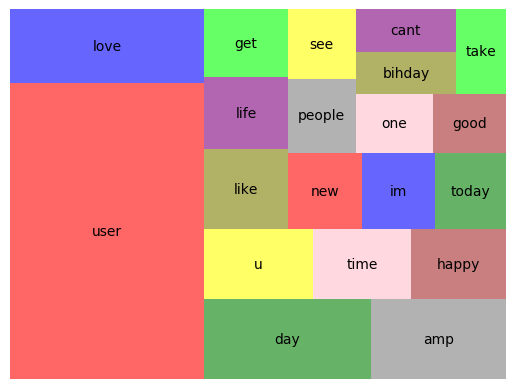

In [228]:
#3.3-4

freq=pd.Series(''.join(ttw2['tweet']).split()).value_counts()[:20]


sizes=freq
label=freq.index
color=['red','blue','green','grey', 'yellow', 'pink', 'brown', 'olive', 'purple', 'lime']
squarify.plot(sizes=sizes, label=label, color=color, alpha=0.6)
plt.axis('off')
plt.show()

No reason to remove most resent words

In [229]:
#leasir nafutsot
#ttw2['tweet'] = ttw2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [230]:
#5
freq=pd.Series(''.join(ttw2['tweet']).split()).value_counts()[:-20]
freq

user                 8084
love                 2022
day                  1873
amp                  1518
u                    1084
                     ... 
tracker                 1
thedescendant           1
julyfridayfeeling       1
hbk                     1
bodily                  1
Length: 58748, dtype: int64

In [231]:
#leasir nadirot
#ttw2['tweet'] = ttw2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

Also no reason to remove not resent word becouse they are hashtags
They also can be helpful

In [232]:
ttw2.head(20)

id  label                                              tweet
0    1      0  user father dysfunctional selfish drags kids d...
1    2      0  user user thanks lyft credit cant use cause do...
2    3      0                                     bihday majesty
3    4      0                        model love u take u time ur
4    5      0                      factsguide society motivation
5    6      0  huge fan fare big talking leave chaos pay disp...
6    7      0  user camping tomorrow user user user user user...
7    8      0  next school year year exams cant think school ...
8    9      0  love land allin cavs champions cleveland cleve...
9   10      0                            user user welcome im gr
10  11      0  ireland consumer price index mom climbed previ...
11  12      0  selfish orlando standwithorlando pulseshooting...
12  13      0                get see daddy today days gettingfed
13  14      1  user cnn calls michigan middle school build wa...
14  15      1  comment australia opkillingbay seashepherd hel...
15  16      0             ouchjunior angrygot junior yugyoem omg
16  17      0                   thankful paner thankful positive
17  18      1                                      retweet agree
18  19      0  friday smiles around via ig user user cookies ...
19  20      0                 know essential oils made chemicals

In [233]:
#3.6
#spellchecker

from autocorrect import Speller


spell = Speller(lang='en')

for ID in range(len(ttw2['tweet'][:20])):
    querywords = ttw2['tweet'][ID].split()
    words_after_speller = [spell(word) for word in querywords]
    ttw2['tweet'][ID] = ' '.join(words_after_speller)



C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [234]:
ttw2.head()

id  label                                              tweet
0   1      0  user father dysfunctional selfish drags kids d...
1   2      0  user user thanks left credit cant use cause do...
2   3      0                                   birthday majesty
3   4      0                        model love u take u time ur
4   5      0                      factsguide society motivation

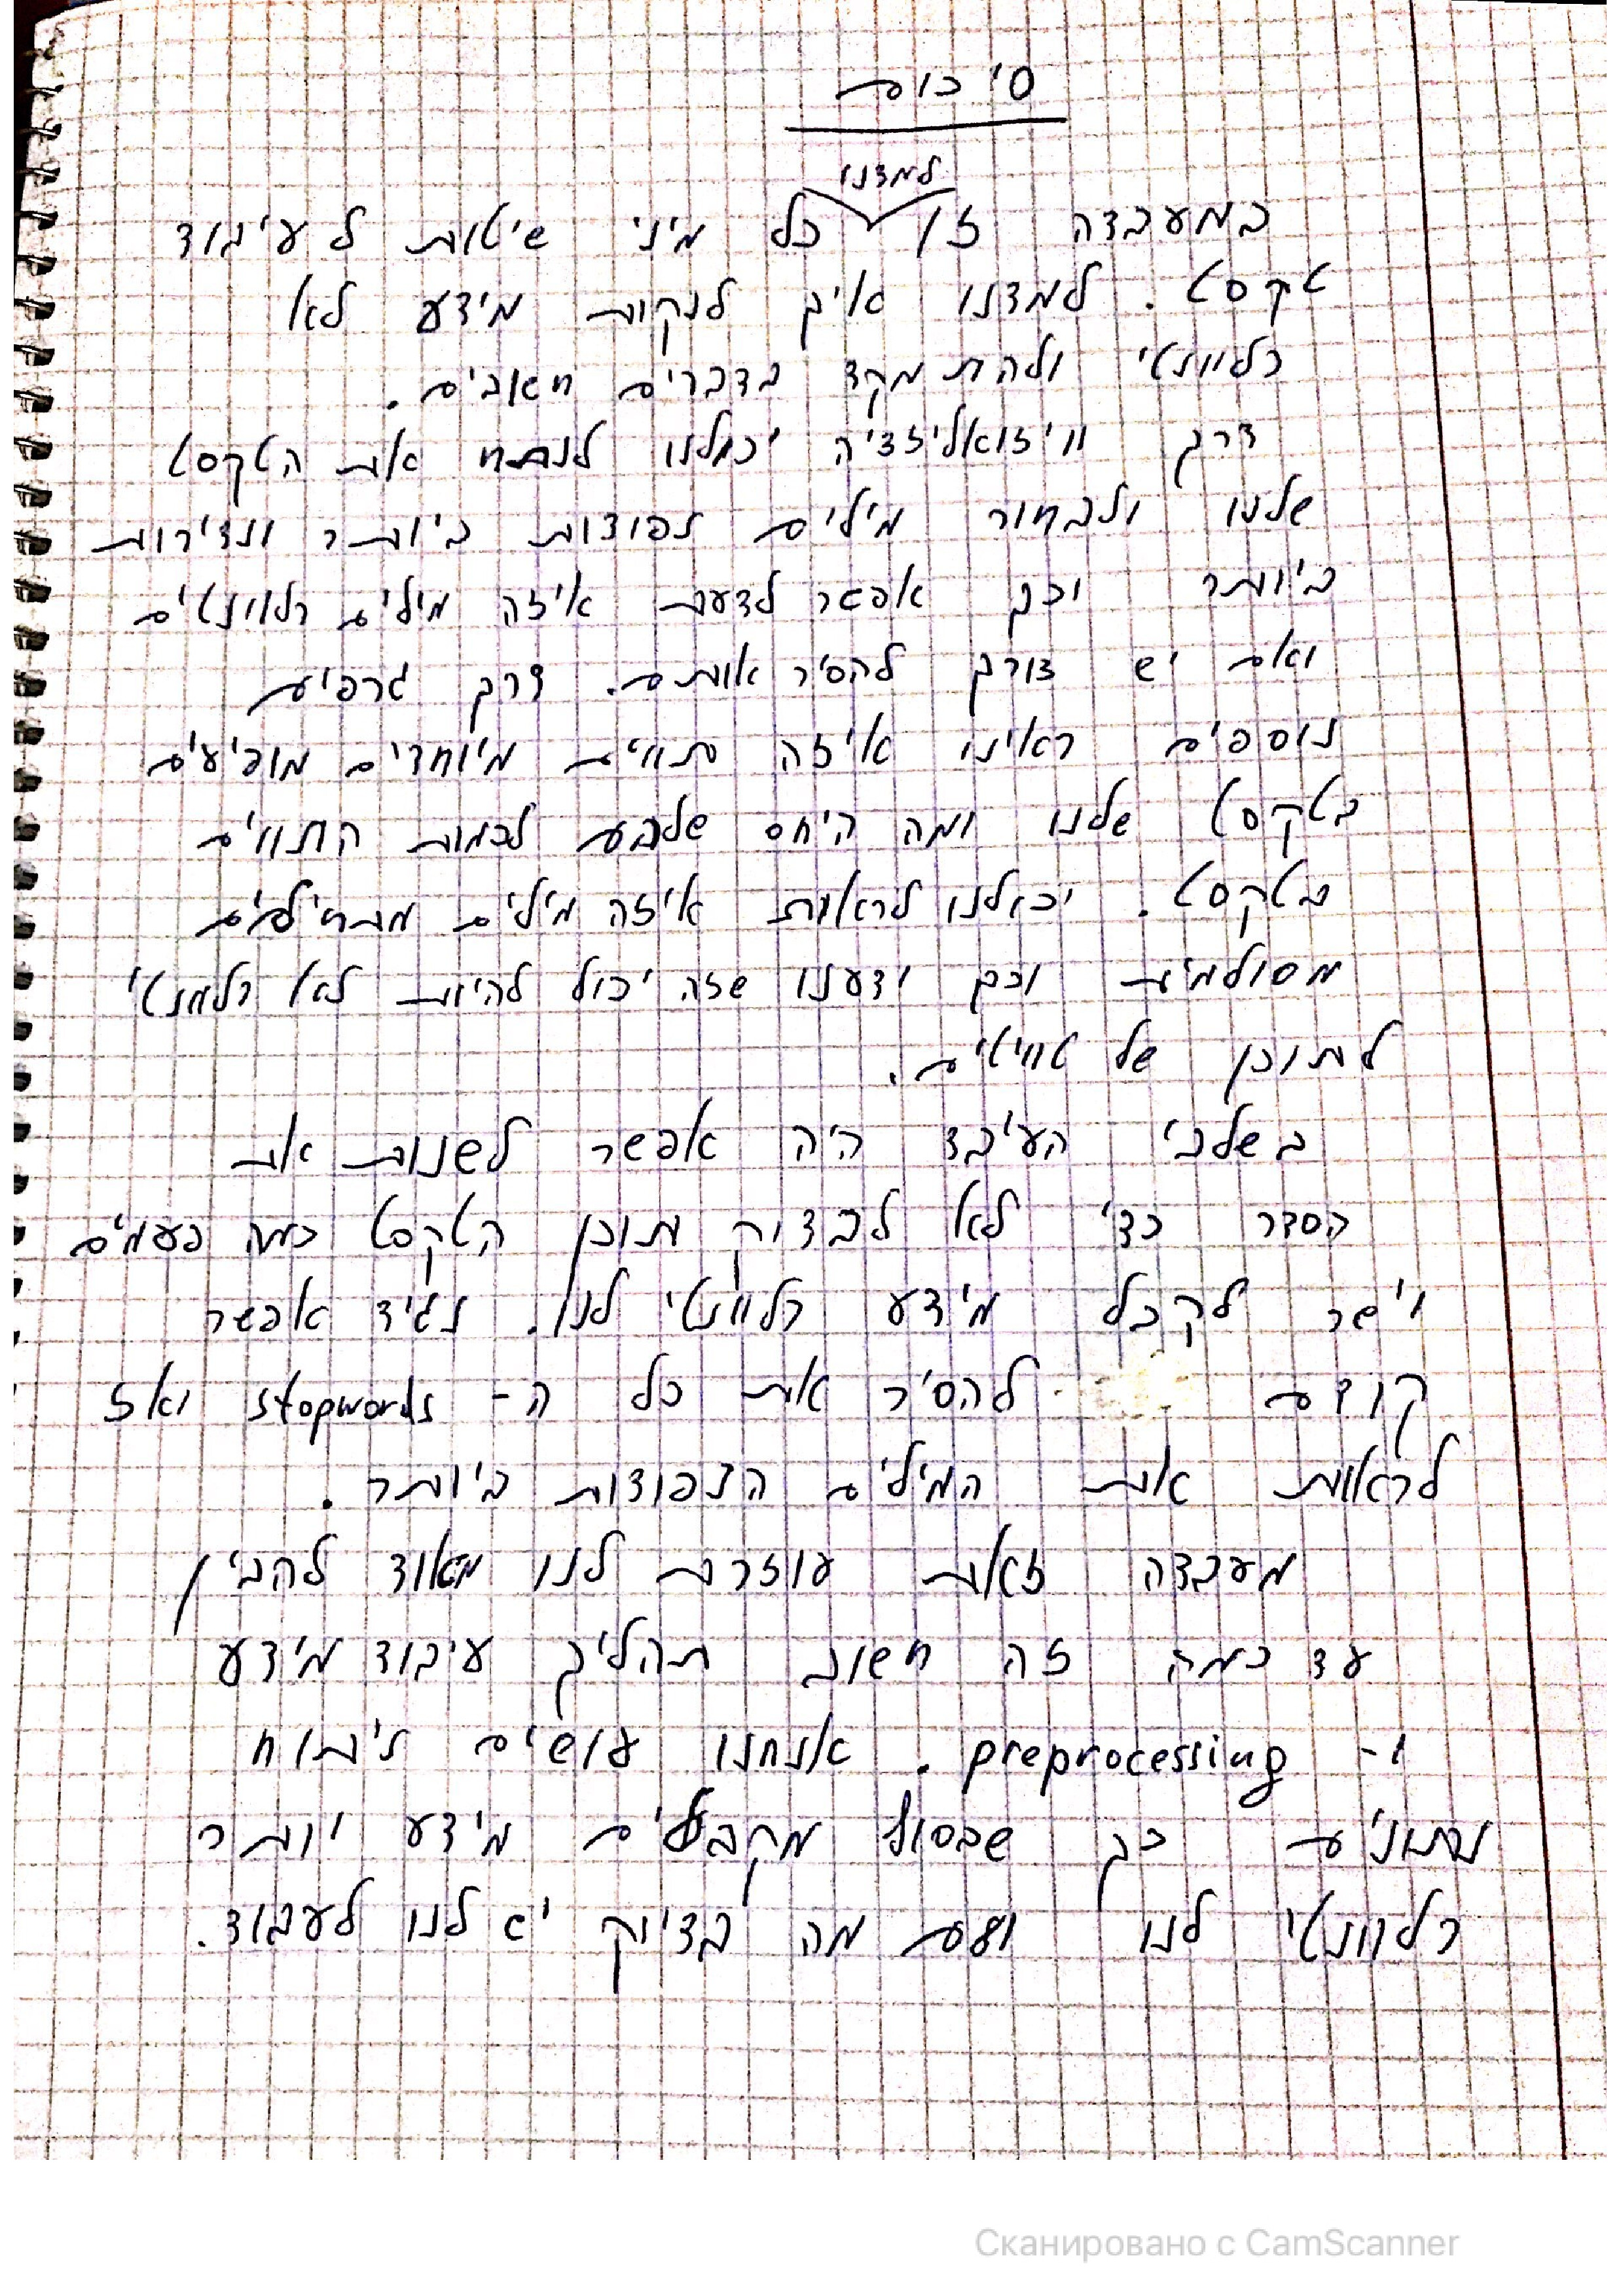

In [237]:
#4
#Summary
from IPython.display import Image
Image("Desktop\CamScanner 08-11-2020 22.00 (pdf.io).jpg")